## Import of libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from functions.len_and_unique_info import len_and_unique_info
from functions.column_metrics import column_metrics
from functions.plot_scp import plot_histograms, plot_bars, plot_graph, plot_corr_matrix, plot_3d_atoms
from functions.train_test_split import train_test_split
from functions.confidence_interval import confidence_interval
from functions.train_test_split import train_test_split

%matplotlib inline


## DataFrames preparation

In [2]:
structures = pd.read_csv('data/structures.csv')
structures.head()

,molecule_name,atom_index,atom,x,y,z
0,dsgdb9nsd_000001,0,C,-0.012698,1.085804,0.008001
1,dsgdb9nsd_000001,1,H,0.002150,-0.006031,0.001976
2,dsgdb9nsd_000001,2,H,1.011731,1.463751,0.000277
3,dsgdb9nsd_000001,3,H,-0.540815,1.447527,-0.876644
4,dsgdb9nsd_000001,4,H,-0.523814,1.437933,0.906397


In [3]:
data = pd.read_csv('data/train.csv')
data.head()

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548
3,3,dsgdb9nsd_000001,1,4,2JHH,-11.2543
4,4,dsgdb9nsd_000001,2,0,1JHC,84.8074


## Initial data analysis

In [4]:
data['type'].unique()

array(['1JHC', '2JHH', '1JHN', '2JHN', '2JHC', '3JHH', '3JHC', '3JHN'],
      dtype=object)

Info about types: https://www.kaggle.com/c/champs-scalar-coupling/discussion/93772

In [5]:
len_and_unique_info([data, structures], ['train.csv', 'structures.csv'])

train.csv|
----------
shape: 	 	 	 (4658147, 6)
id                          4658147
molecule_name                 85003
atom_index_0                     29
atom_index_1                     29
type                              8
scalar_coupling_constant    2182935
dtype: int64

--------------------------------------------------
structures.csv|
---------------
shape: 	 	 	 (2358657, 6)
molecule_name     130775
atom_index            29
atom                   5
x                2358441
y                2358364
z                2358421
dtype: int64

--------------------------------------------------


## Plots

### Scalar coupling constant

Text(0.5, 1.0, 'Scalar Coupling Constant Distribuition')

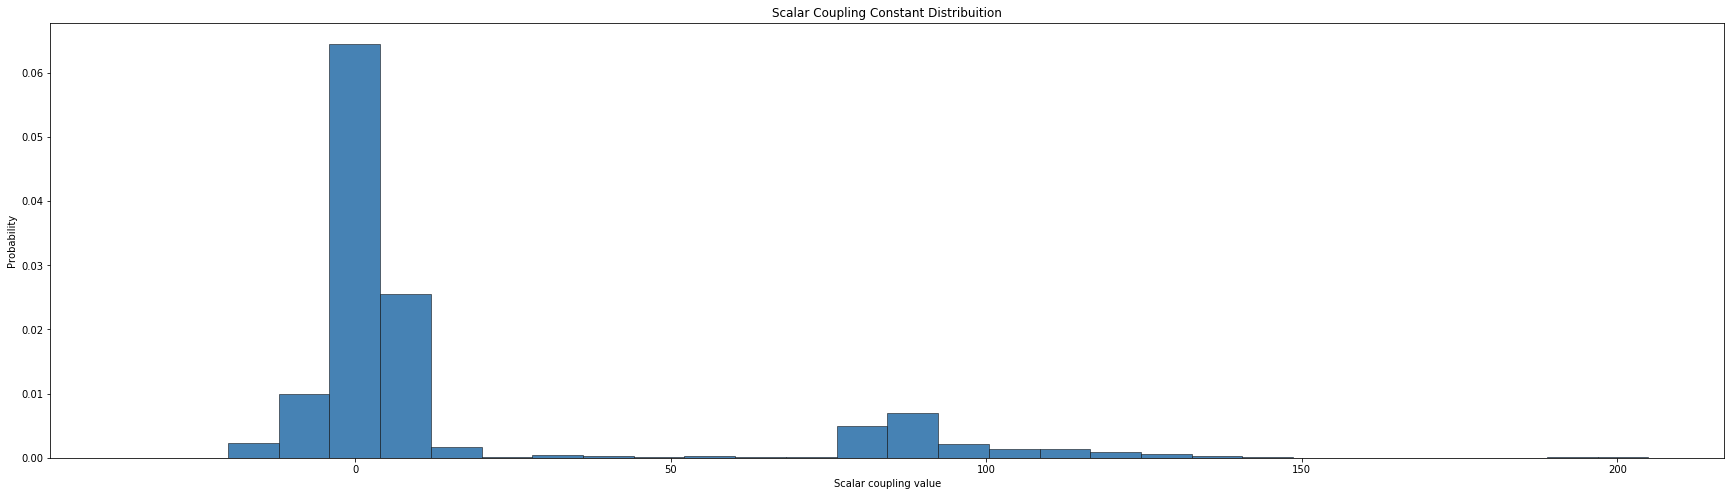

In [6]:
fig = plt.figure(figsize=(30, 8))
plt.hist(data['scalar_coupling_constant'], bins=30, color='steelblue', edgecolor='black', linewidth=0.5, density=True)  
plt.xlabel('Scalar coupling value')
plt.ylabel('Probability')
plt.title('Scalar Coupling Constant Distribuition')


In [7]:
column_metrics(data['scalar_coupling_constant'])

Średnia: 	 15.9216499182591
Wariancja: 	 1220.9417857191677
Skośność: 	 2.024252286414261
Kurtoza: 	 3.028378386728597
Mediana: 	 2.28113
Mediana: 	 2.28113
Moda: 	 	 -11.652000000000001


Unimodal histogram, right-angled. Leptokurtic distribution, which means that the trait values are more concentrated than with the normal distribution.

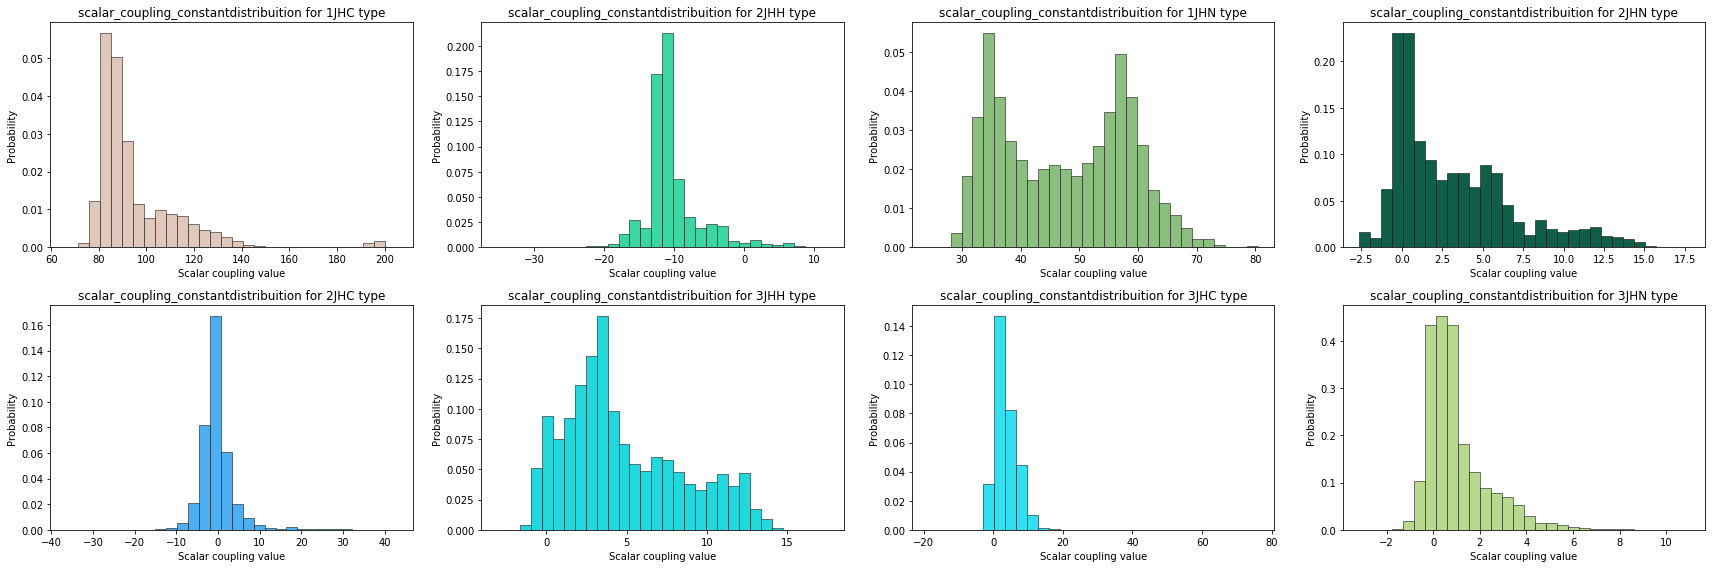

In [8]:
plot_histograms(data, 'type', 'scalar_coupling_constant', 'Scalar coupling value')

Distributions for individual types are very different.


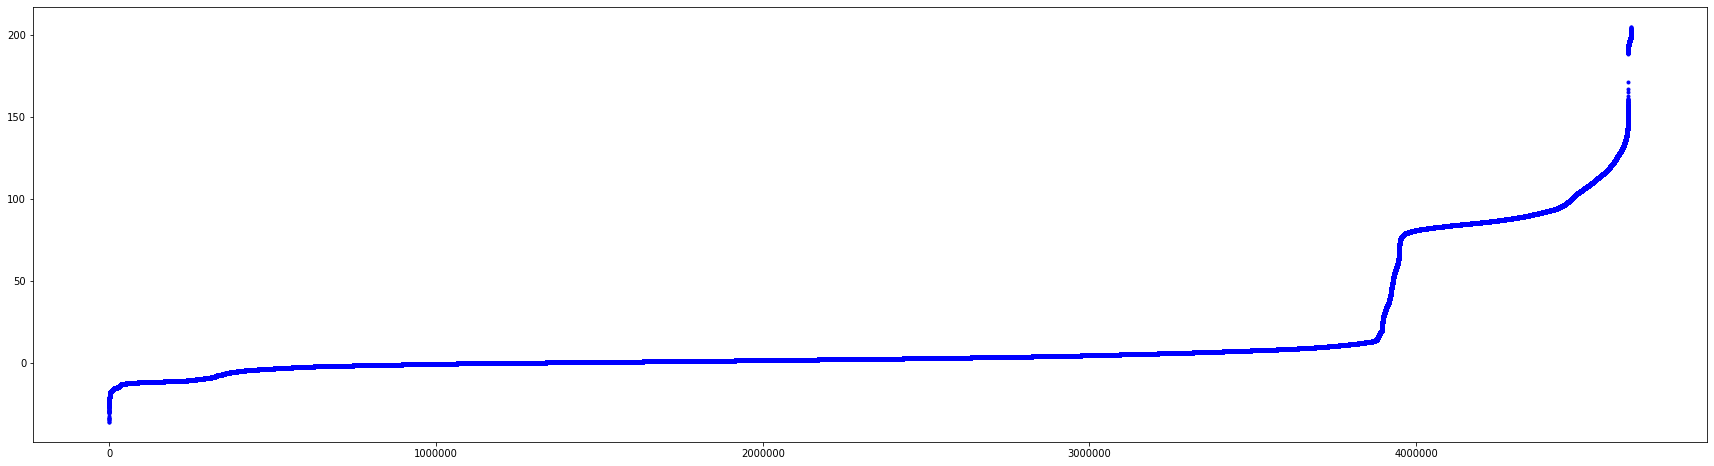

In [9]:
fig = plt.figure(figsize=(30, 8))
sorted_scc = sorted(data['scalar_coupling_constant'])
plt.plot(sorted_scc,'b.')

In [10]:
array_of_spaces = np.array(sorted_scc[1:]) - np.array(sorted_scc[:-1])
max_space_index = np.where(array_of_spaces == max(array_of_spaces))
print('On the chart, we can see a big difference between the "scalar_coupling_constant" values ​​in the range: [', sorted_scc[max_space_index[0][0]], ',', sorted_scc[max_space_index[0][0] + 1], ']')

On the chart, we can see a big difference between the "scalar_coupling_constant" values ​​in the range: [ 171.22 , 188.507 ]


## Train test split

The data in train.csv has no labels. It is probably related to the fact that the data we are analyzing are data from the contest on kaggle.com, which ended two months ago. Participants were likely to predict the results and send them for review. However, this is not a test set that will allow us to evaluate models that we will train in the future. Therefore, I divide data from train.csv into a training and test model.

In [11]:
train, test = train_test_split(data, 'molecule_name')

In [12]:
train.head()

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548
3,3,dsgdb9nsd_000001,1,4,2JHH,-11.2543
4,4,dsgdb9nsd_000001,2,0,1JHC,84.8074


## Indices

Do the indexes carry any additional information?

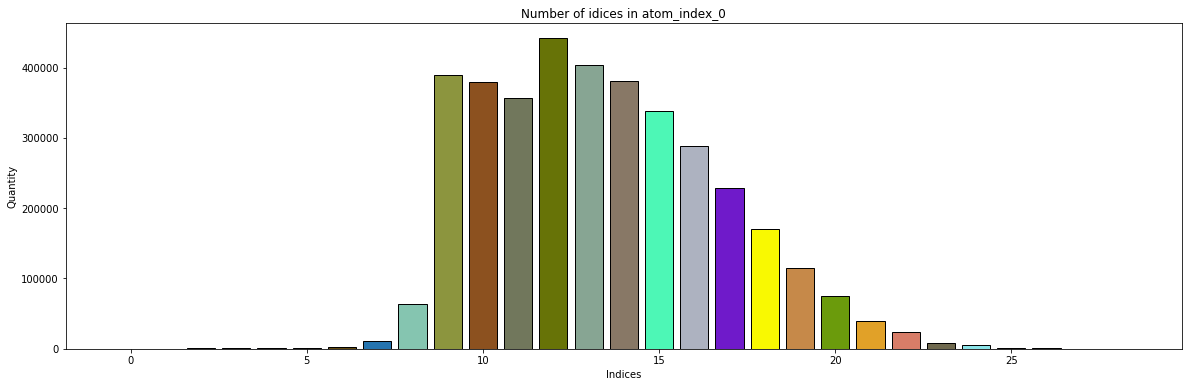

In [13]:
plot_bars(train['atom_index_0'], 'atom_index_0')

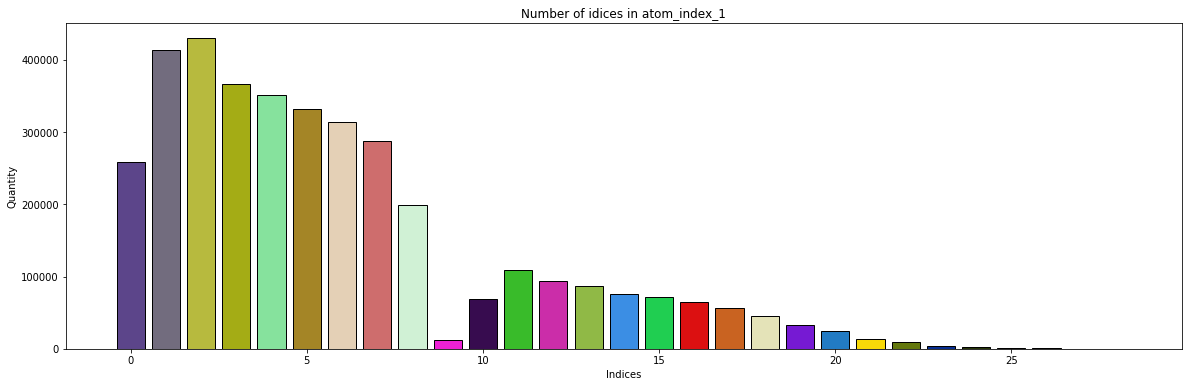

In [14]:
plot_bars(train['atom_index_1'], 'atom_index_1')

We see that some indexes appear much less frequently than others, due to the smaller amount of data on such complex molecules (with values above 20), or the structure of the data (most indexes from 0 to 5 saved for index_1). We remove these values so that they do not affect further visualizations.

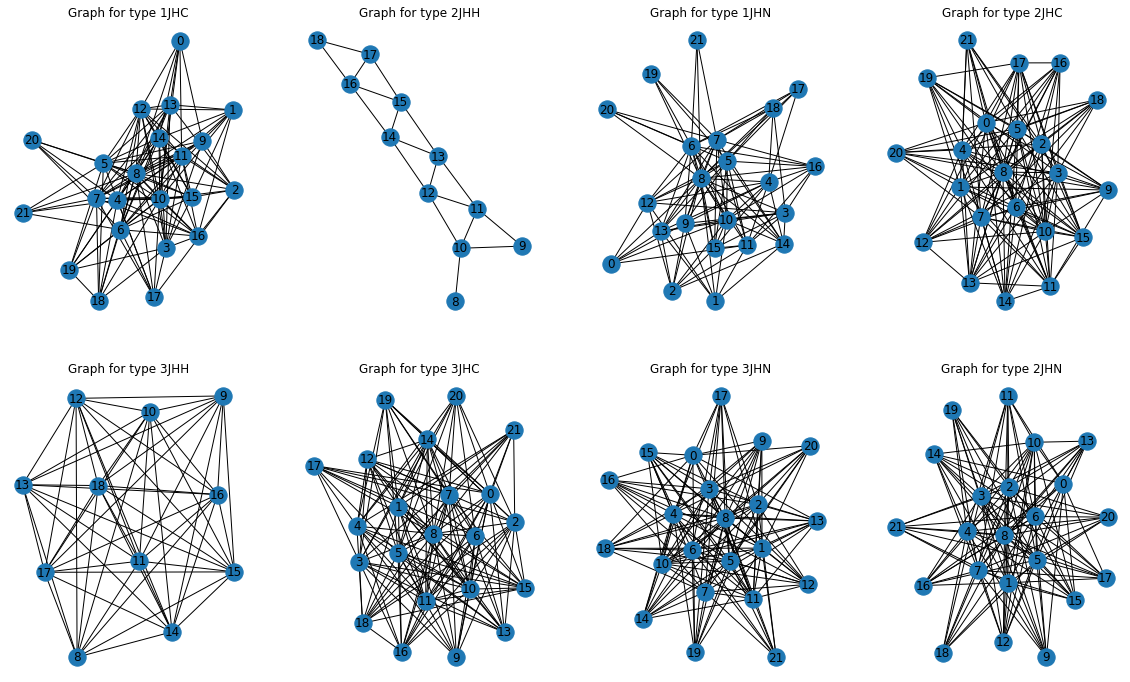

In [15]:
plot_graph(train, 'type', 'atom_index_0', 'atom_index_1', 'scalar_coupling_constant')

Graphs show the relationships between atoms with specific indexes for individual types. Connections occur between nodes representing the atoms for which we have calculated the scalar coupling constant. Node connecting vectors have lengths appropriate to the scalar coupling constant

From the above visualizations, it can be seen that the data has been constructed in such a way that the indexes matter. Otherwise, most nodes would be connected with each other, whereas only a few connections originate from individual nodes. It probably reflects to some extent the structure of the molecules that we study.

### Connection types

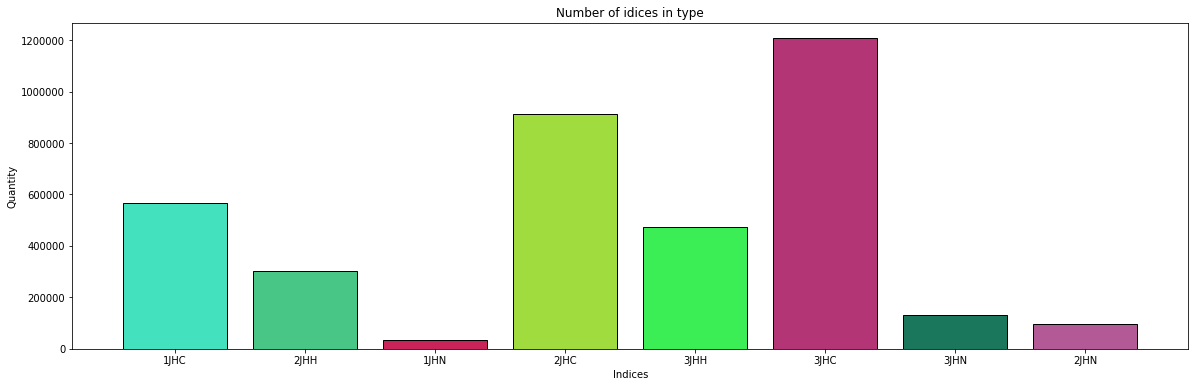

In [16]:
plot_bars(train['type'], 'type')

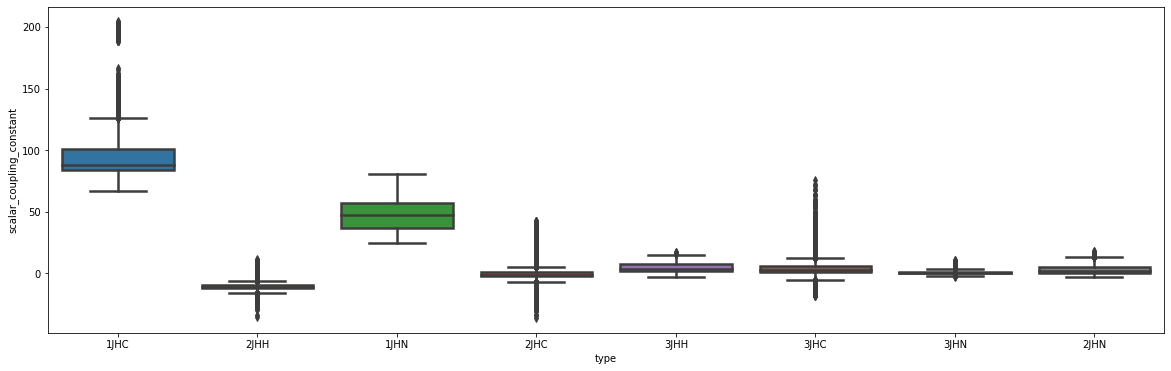

In [17]:
fig = plt.figure(figsize=(20, 6))
ax = fig.gca()
ax = sns.boxplot(x="type", y="scalar_coupling_constant", data=train, linewidth=2.5)

'1JHC', '2JHC' and '3JHC' have a lot of outliers. Such a result was to be expected because they are the three most popular types. However, it should also be noted that there are many outliers, and some of them stand out very strongly.

### Correlations

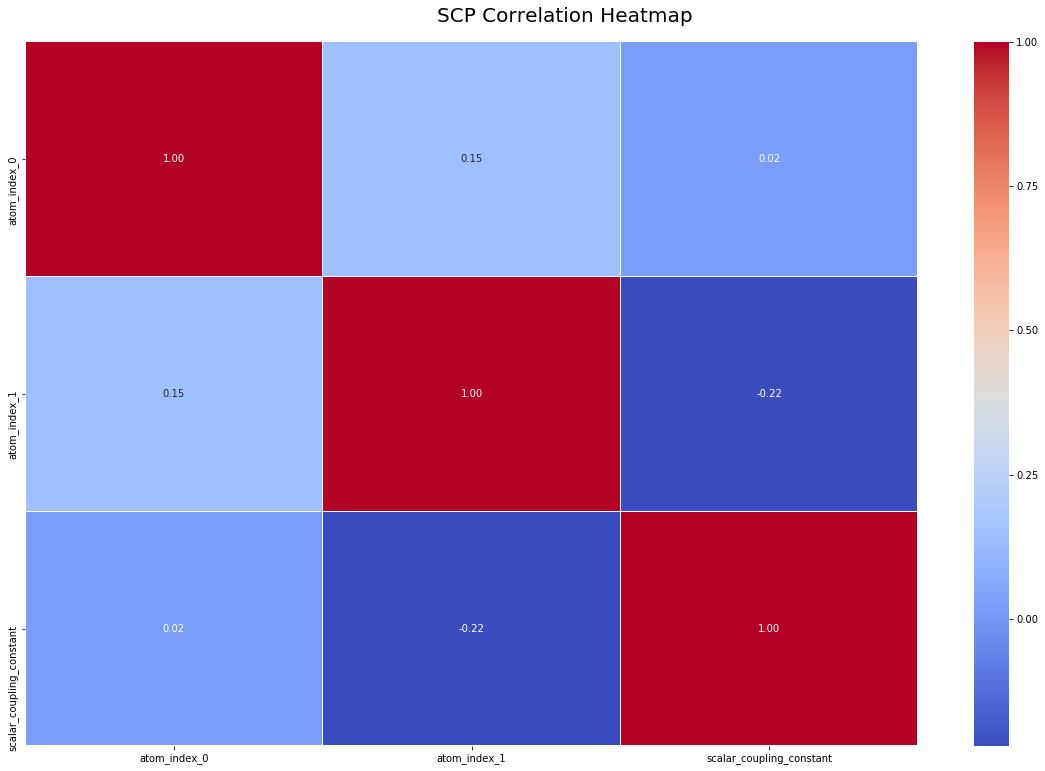

In [18]:
plot_corr_matrix(train.drop(['id'], axis=1), 'SCP Correlation Heatmap')

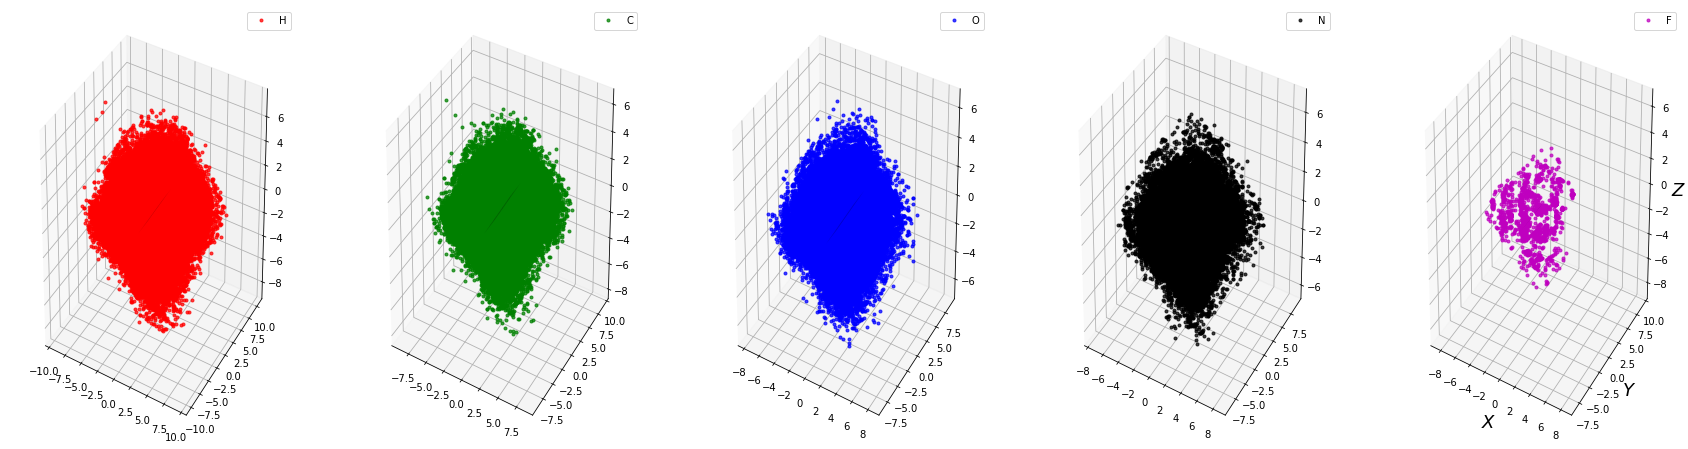

In [19]:
plot_3d_atoms(structures, ['x', 'y', 'z'], 'atom', individual=True)

On the scattering diagrams created for individual atoms we can observe how the atoms studied by us are distributed in 3d.

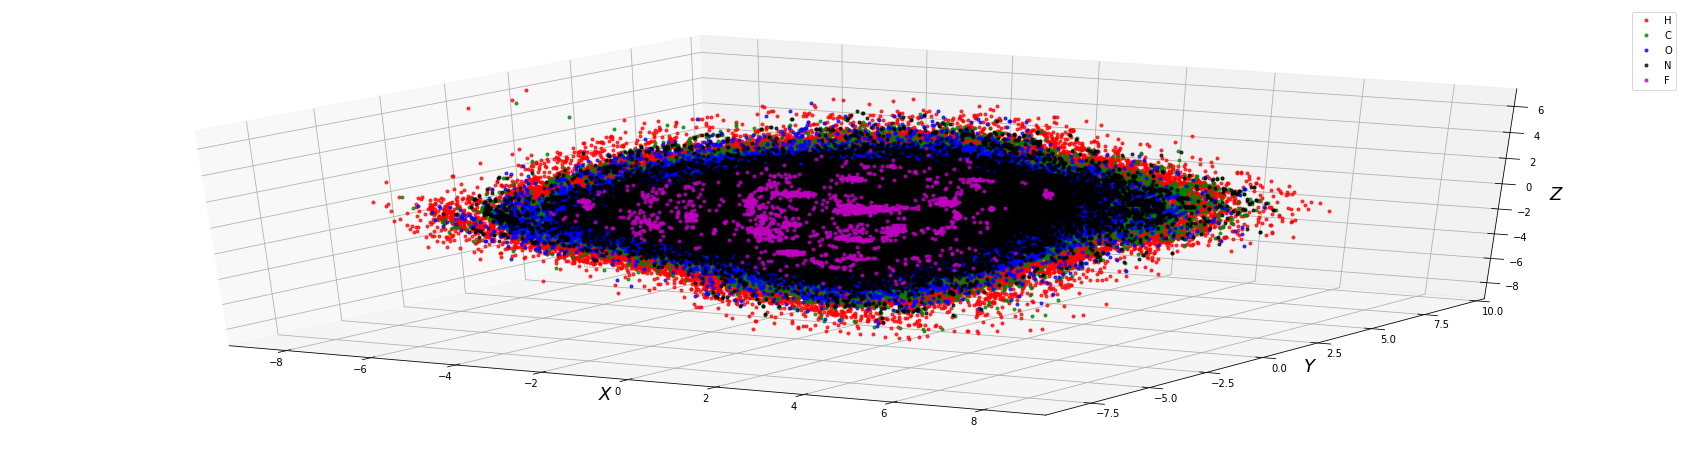

In [20]:
plot_3d_atoms(structures, ['x', 'y', 'z'], 'atom')

On the graph where all the points have been plotted, we can see how the atoms behave relative to each other. Points representing individual types of atoms are plotted in order from the atoms with the type with the largest number of instances. For example, thanks to this, we can observe that the hydrogen ($H$) atoms are more dispersed than the nitrogen ($N$) atoms.